# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [2]:
# Load the necessary packages

import numpy as np
import pandas as pd

In [3]:
# Load the Cardio Dataset
    
mydata = pd.read_csv('CardioGoodFitness-1.csv')      # use "data=pd.read_excel('CardioGoodFitness-1.xlsx')" for excel file

In [ ]:
mydata.head() #top 5 data

In [ ]:
mydata.head(10)  #top 10 data

In [ ]:
mydata.tail()    #bottom 5 data

In [ ]:
mydata.tail(10)  #bottom 10 data

In [ ]:
mydata.sample()    #random data only one

In [ ]:
mydata.sample(10)   #random 10 data

In [ ]:
mydata.shape  # (rows,columns)

In [ ]:
mydata.describe() #only for numerical data ---important        Also Skewed data coz mean not equal to median

In [4]:
mydata.describe(include="all")   # top - max occurrence and freq of occurrence 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
mydata.info()

In [ ]:
mydata.dtypes

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))

In [ ]:
mydata.hist()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

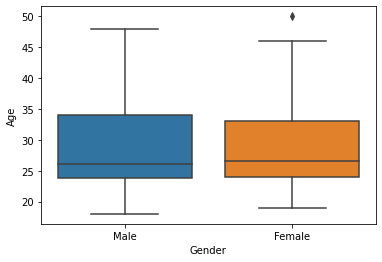

In [9]:
import seaborn as sns          ##box plot for outlier and for comparison  

sns.boxplot(x="Gender", y="Age", data=mydata)

In [ ]:
import seaborn as sns

sns.boxplot(y='Gender', x='Age',data=mydata)

In [ ]:
import seaborn as sns

sns.boxplot(x='Product', y='Gender',data=mydata)       # either one should be numerical

In [ ]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

In [ ]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'] )

In [ ]:
sns.countplot(x="Product", hue="Gender", data=mydata)

In [ ]:
pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)  #aggfunc =mean(by default if not used),sum,max,min,len(same as 'count' gives count) can also be used

In [ ]:
pd.pivot_table(mydata,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

In [ ]:
pd.pivot_table(mydata,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

In [ ]:
sns.pairplot(mydata,diag_kind='kde')

In [ ]:
sns.pairplot(mydata)

In [ ]:
mydata['Age'].std()

In [ ]:
mydata['Age'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

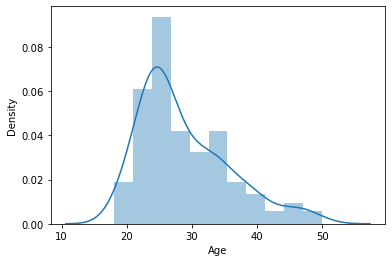

In [10]:
sns.distplot(mydata['Age'])

In [ ]:
mydata.hist(by='Gender',column = 'Age')   

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

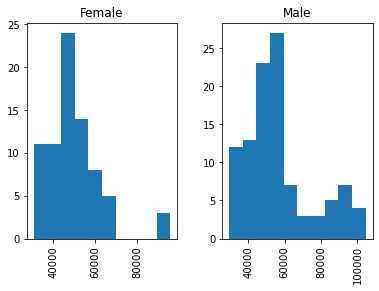

In [5]:
mydata.hist(by='Gender',column = 'Income')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

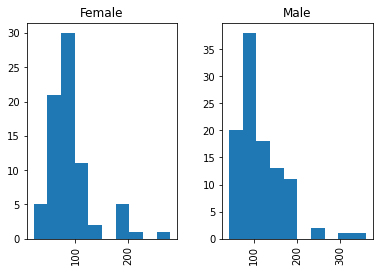

In [6]:
mydata.hist(by='Gender',column = 'Miles')

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

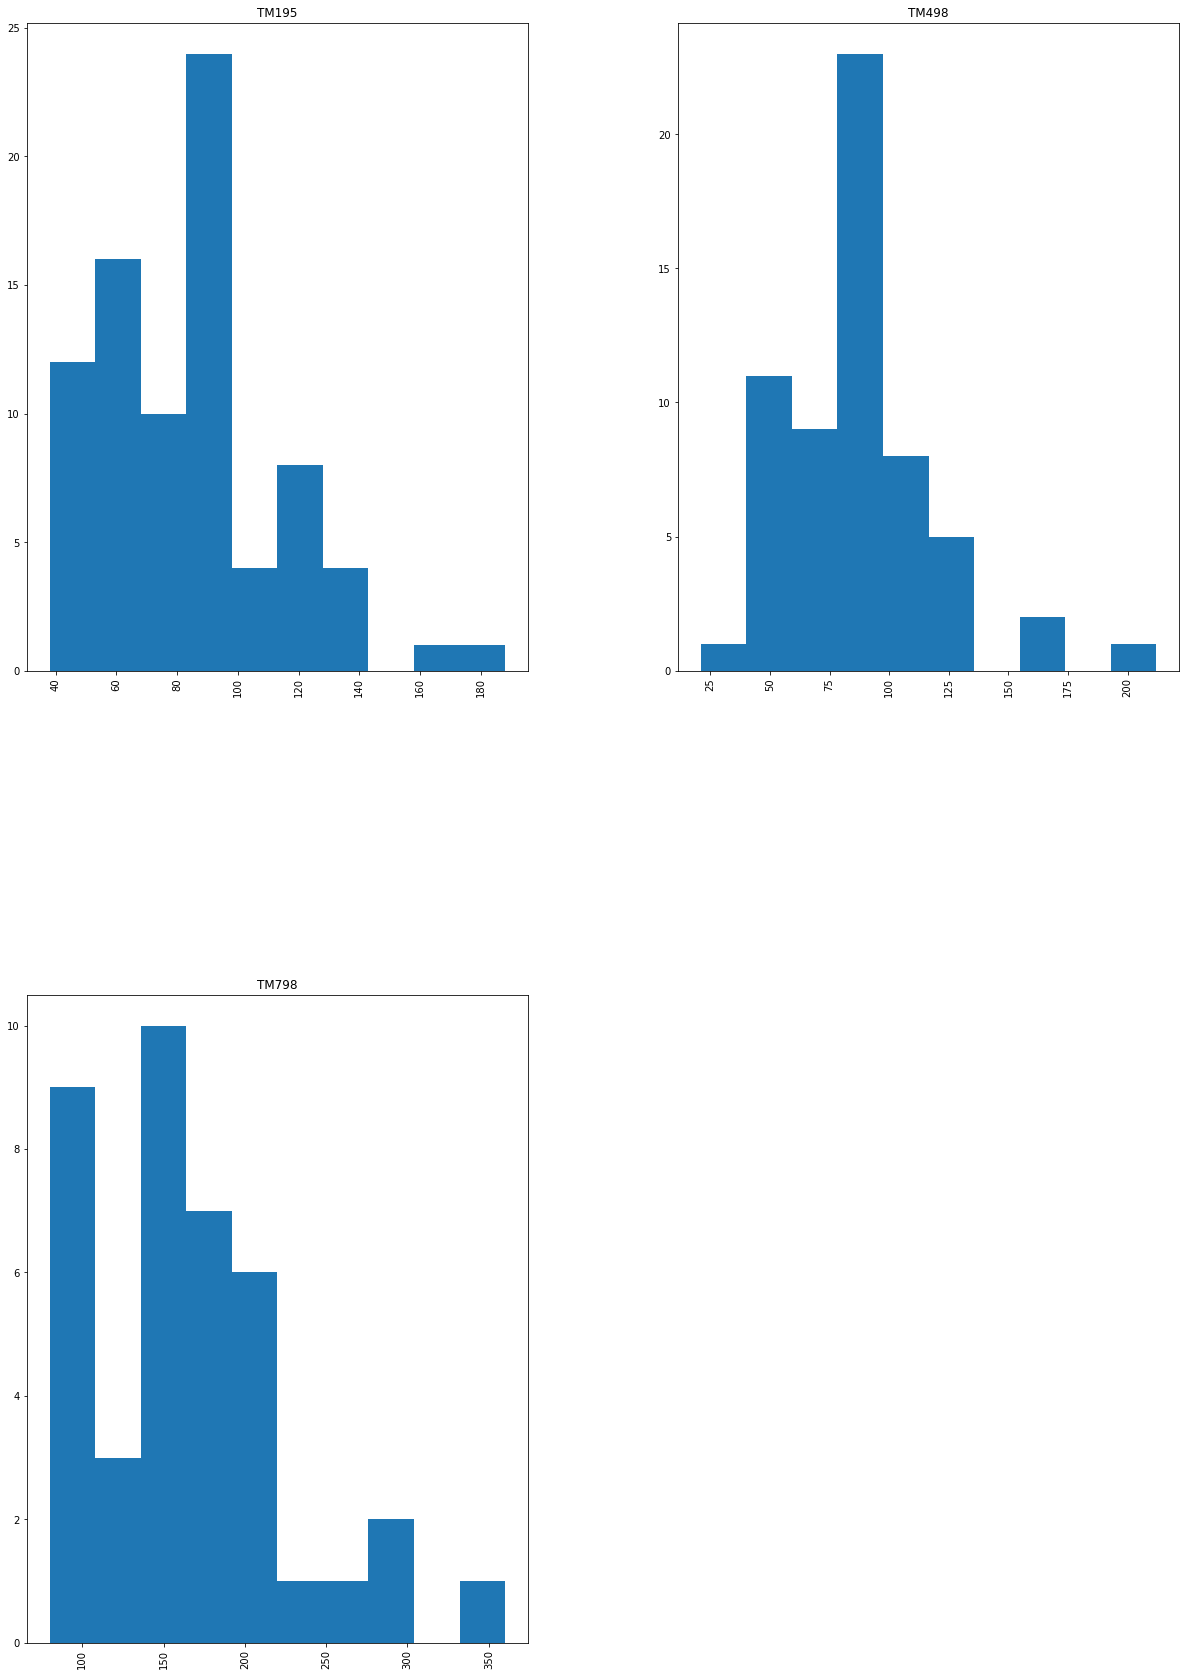

In [7]:
mydata.hist(by='Product',column = 'Miles', figsize=(20,30))

In [ ]:
corr = mydata.corr()
corr

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Miles']
x = mydata[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)



In [ ]:
regr.coef_

In [ ]:
regr.intercept_

In [ ]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness